In [1]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [2]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [3]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [4]:
mdl01=mdl[mdl['Server Name']=='CALBIPRD01']

<B>CALPBPRD01 CPU %<B>

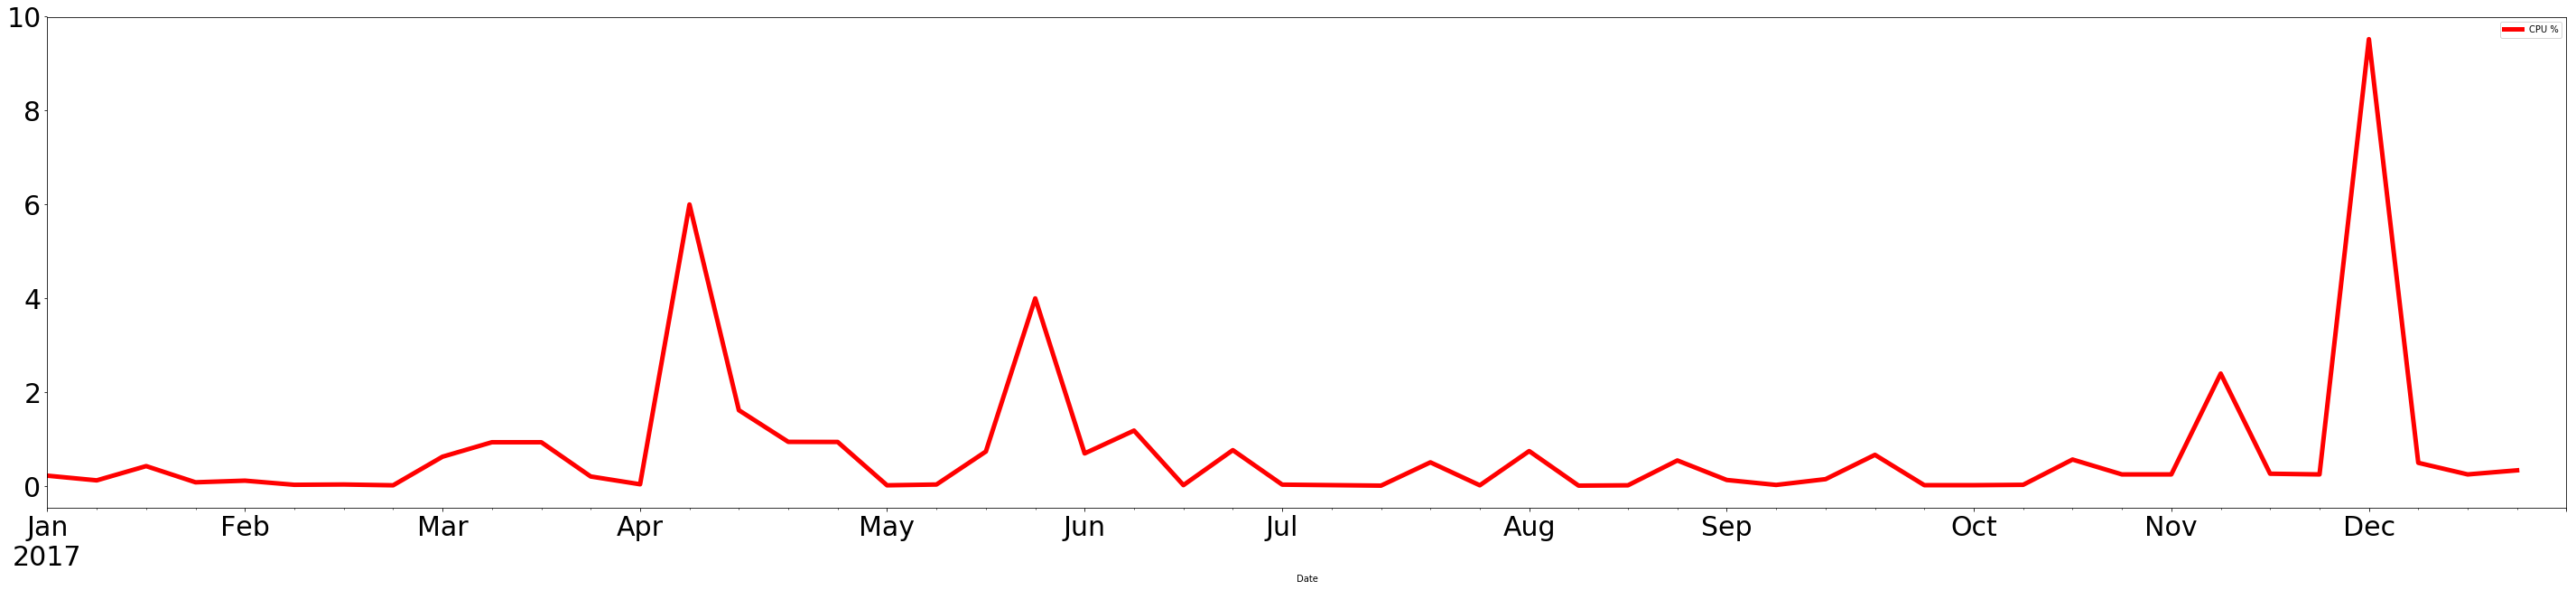

In [5]:
mdl01.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='CPU %', color ='red')

In [6]:
mdl01.set_index('Date', inplace=True)
mdl01['Month']= mdl01.index.month
mdl01['Day']=mdl01.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
mdl01.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBIPRD01,Wk 1,0.2260,6.2,1,7
2017-01-14,CALBIPRD01,Wk 2,0.1264,6.2,1,14
2017-01-21,CALBIPRD01,Wk 3,0.4300,5.6,1,21
2017-01-28,CALBIPRD01,Wk 4,0.0850,5.7,1,28
2017-02-04,CALBIPRD01,Wk 5,0.1200,6.2,2,4


<B>CALBIPRD01 CPU% (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


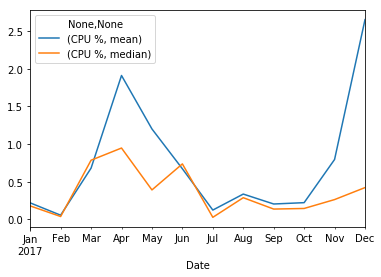

In [8]:
mdl01[['CPU %']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for CPU % - Week / Month Difference<b>

In [9]:
print 'CALBIPRD01 CPU % Week Corr', mdl01['CPU %'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRD01 CPU % Month Corr', mdl01['CPU %'].dropna().resample('M').mean().autocorr(lag=1)

CALBIPRD01 CPU % Week Corr 0.00762820709217
CALBIPRD01 CPU % Month Corr 0.390819340872


<b>Autocorrlation for CPU % - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [10]:
print 'lag =1 :', mdl01['CPU %'].dropna().autocorr(lag=1)
print 'lag =2 :', mdl01['CPU %'].dropna().autocorr(lag=2)
print 'lag =3 :', mdl01['CPU %'].dropna().autocorr(lag=3)
print 'lag =4 :', mdl01['CPU %'].dropna().autocorr(lag=4)
print 'lag =5 :', mdl01['CPU %'].dropna().autocorr(lag=5)
print 'lag =6 :', mdl01['CPU %'].dropna().autocorr(lag=6)
print 'lag =7 :', mdl01['CPU %'].dropna().autocorr(lag=7)
print 'lag =12 :', mdl01['CPU %'].dropna().autocorr(lag=12)
print 'lag =24 :', mdl01['CPU %'].dropna().autocorr(lag=24)
print 'lag =24 :', mdl01['CPU %'].dropna().autocorr(lag=34)

lag =1 : 0.00762820709217
lag =2 : -0.0472959064681
lag =3 : 0.103410521557
lag =4 : -0.0167351051209
lag =5 : -0.0612215848183
lag =6 : 0.0204376796219
lag =7 : 0.137849151395
lag =12 : -0.158907981655
lag =24 : 0.0280507152108
lag =24 : 0.943587384882


<b> CALBIPRD01 CPU % Autocorrlation - Month Lag 1 to 11</b>

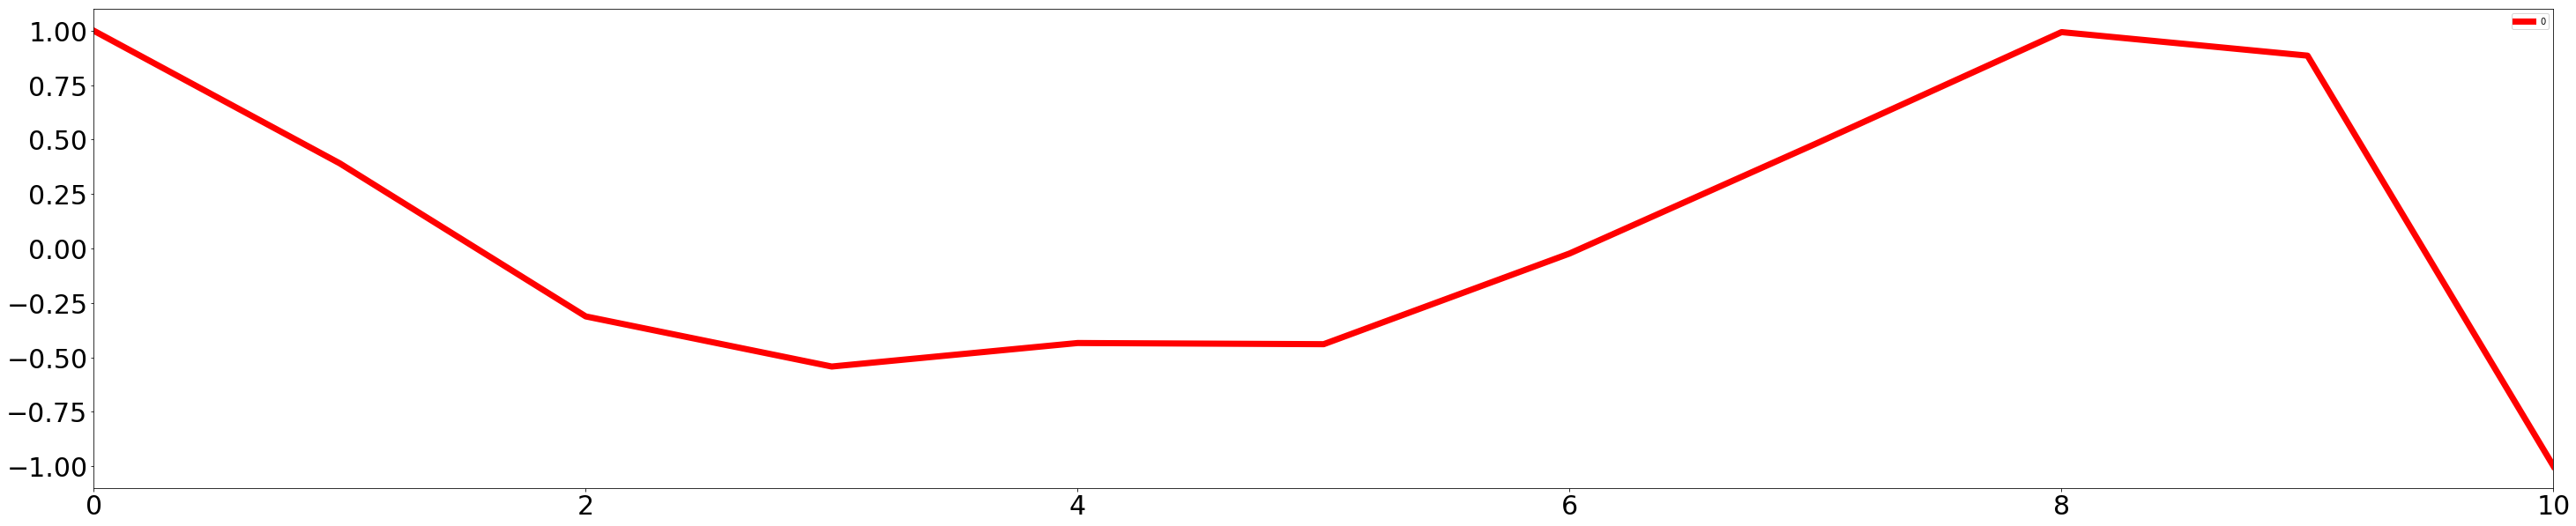

In [11]:
autoc = []

for i in range(11):
    autoc.append(mdl01['CPU %'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=7.0)

<b> CALBIPRD01 CPU % Autocorrlation - Week Lag 1 to 51</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


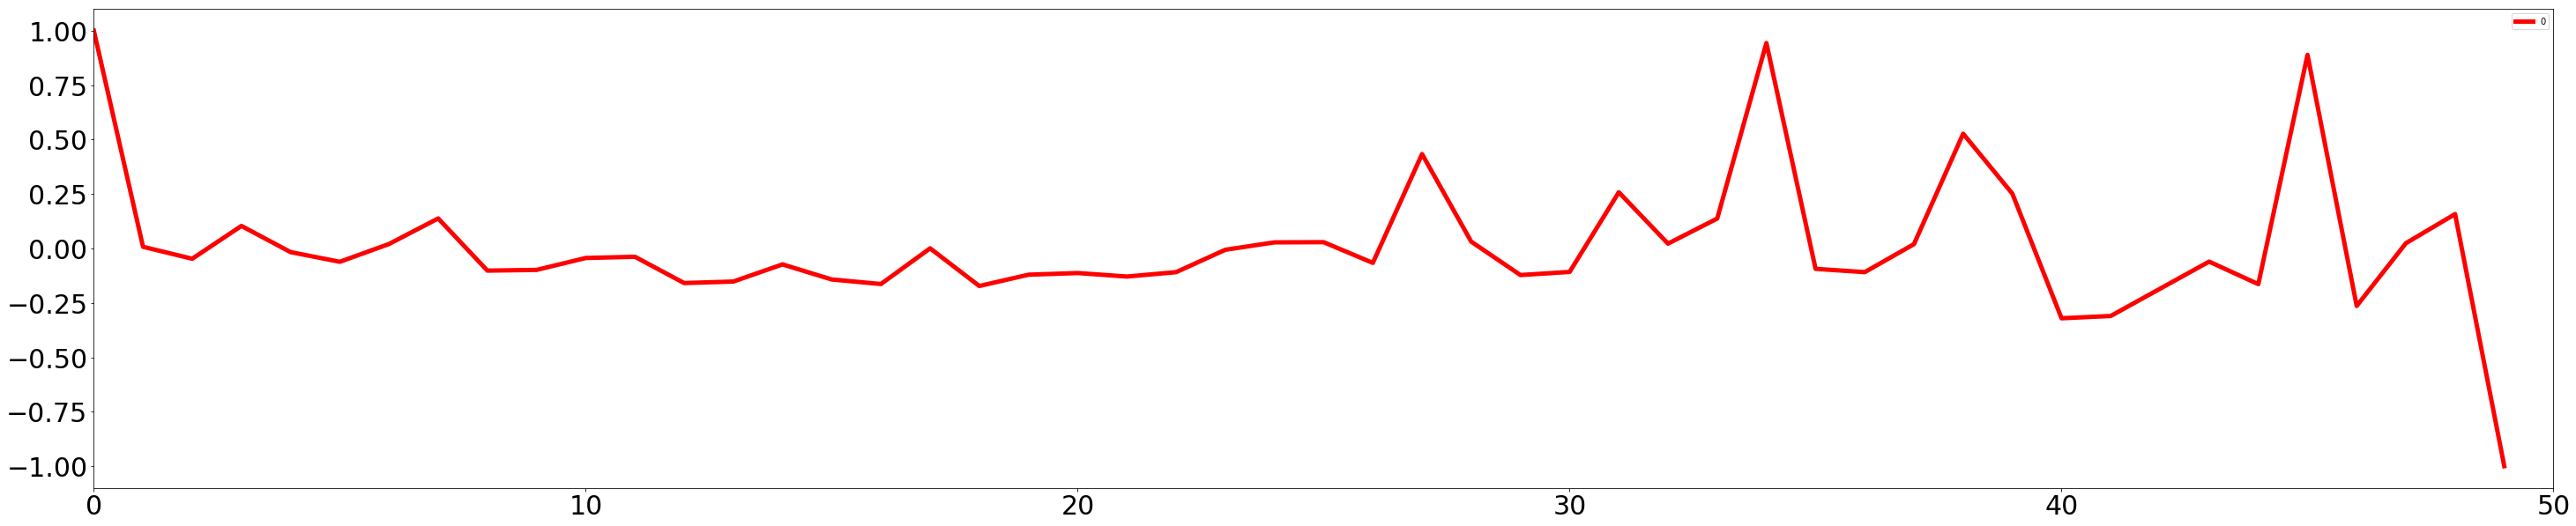

In [12]:
autoc = []

for i in range(51):
    autoc.append(mdl01['CPU %'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


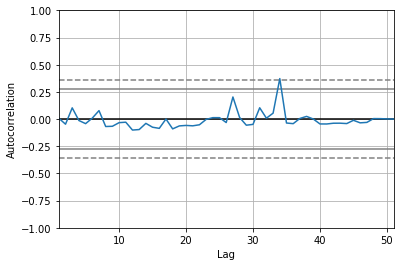

In [13]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdl01['CPU %'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


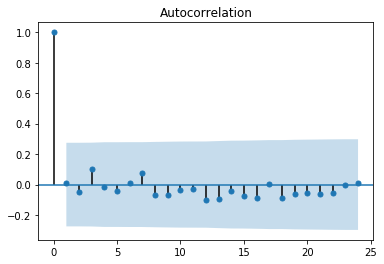

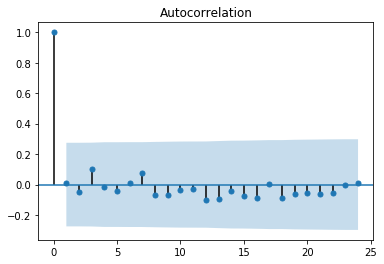

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mdl01['CPU %'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
#plot_acf(mdl01['CPU %'].dropna().diff(1).dropna(),lags=24) 

<b> Trend and Seasonality falls within confident intervel, so no need of calculating 'diff' </b>
<br>Note:</br>
<br>Autocorrelation ~ 1 for lag 1, so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

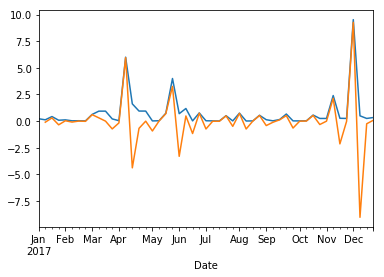

In [17]:
mdl01['CPU %'].dropna().plot()
mdl01['CPU %'].dropna().diff(1).plot()

In [16]:
from statsmodels.tsa.arima_model import ARMA

mdl01 = mdl01[['CPU %']].dropna().astype(float)
model = ARMA(mdl01, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   51
Model:                     ARMA(1, 0)   Log Likelihood                 -96.611
Method:                       css-mle   S.D. of innovations              1.609
Date:                Sat, 06 Jan 2018   AIC                            199.222
Time:                        13:18:41   BIC                            205.017
Sample:                    01-07-2017   HQIC                           201.436
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7536      0.227      3.321      0.002       0.309       1.198
ar.L1.CPU %     0.0075      0.139      0.054      0.957      -0.265       0.280
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          132.8536           +0.0000j          132.8536            0.0000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'CPU %' coef is 0.0075 which is less than 1, so no need to use 'diff' and P value is > .05 which is not significant.</br>
<br> 2. From ARMA Model 'CPU %' coef is 0.0075 and autocorrelation at lag 1 is  0.00762820709217 , which is not same <b>Therefore, the series is not stationary ? </b> </br>

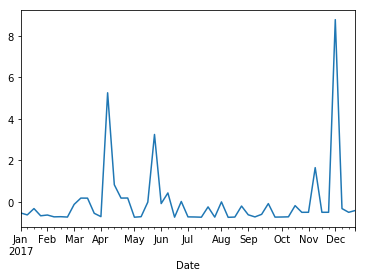

In [260]:
model.resid.plot()

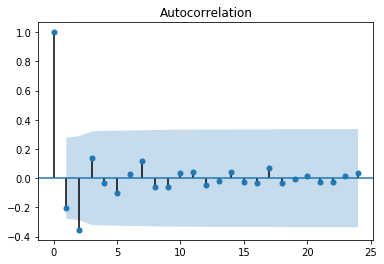

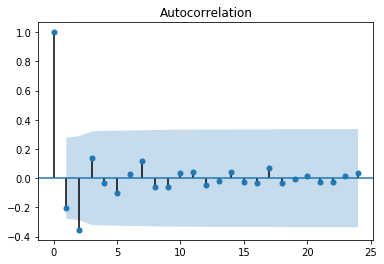

In [280]:
plot_acf(model.resid, lags=24)

<b>ARMA AR=1, MA=1</b>
<br><b>Note:</b></br>
<br>Error - The computed initial AR coefficients are not stationary You should induce stationarity, choose a different model order, or you canpass your own start_params.</bR>

In [263]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [281]:
mdl01 = mdl01[['CPU %']].dropna().astype(float)
model = ARMA(mdl01, (0, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   51
Model:                     ARMA(0, 1)   Log Likelihood                 -96.611
Method:                       css-mle   S.D. of innovations              1.609
Date:                Fri, 05 Jan 2018   AIC                            199.221
Time:                        13:39:44   BIC                            205.017
Sample:                    01-07-2017   HQIC                           201.436
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7536      0.227      3.318      0.002       0.308       1.199
ma.L1.CPU %     0.0083      0.146      0.057      0.955      -0.278       0.295
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1         -120.2493           +0.0000j          120.2493            0.5000
-----------------------------------------------------------------------------
"""

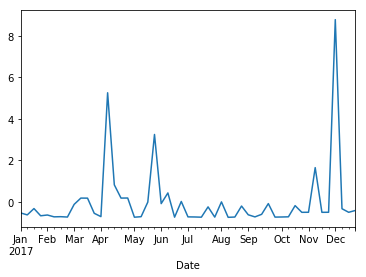

In [282]:
model.resid.plot()

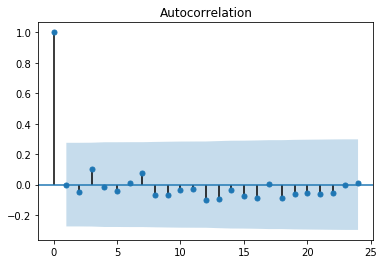

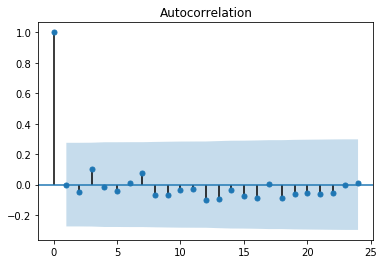

In [284]:
plot_acf(model.resid, lags=24)

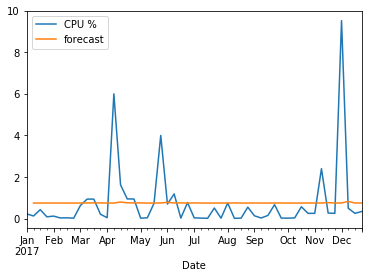

In [286]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl01['CPU %'].dropna().plot(ax=ax)
fig = model.plot_predict(1,50, ax=ax, plot_insample=False)

<b>ARIMA</b>

In [326]:
from statsmodels.tsa.arima_model import ARIMA
mdl01 = mdl01[['CPU %']].dropna().astype(float)
model = ARIMA(mdl01, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.CPU %   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -106.079
Method:                       css-mle   S.D. of innovations              2.014
Date:                Fri, 05 Jan 2018   AIC                            218.159
Time:                        18:23:57   BIC                            223.895
Sample:                    01-14-2017   HQIC                           220.343
                         - 12-23-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.196      0.012      0.990      -0.381       0.386
ar.L1.D.CPU %    -0.4645      0.123     -3.785      0.000      -0.705      -0.224
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1529           +0.0000j            2.1529            0.5000
-----------------------------------------------------------------------------
"""

In [327]:
mdl01['CPU %'].dropna().diff(1).autocorr(1)
#mdl01['CPU %'].dropna().autocorr(1)

-0.47366985707325149

<b>Note:</b>
<br>From ARIMA (1,1,0) coef is -0.4645 and diff(1).autocorr(1) is -0.47366985707325149 which is not same <b>what it indicates,</b> P value is 0.000 which is significate </br>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


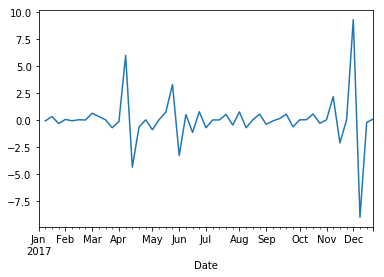

In [328]:
#model.resid.plot()
mdl01['CPU %'].dropna().diff(1).plot()

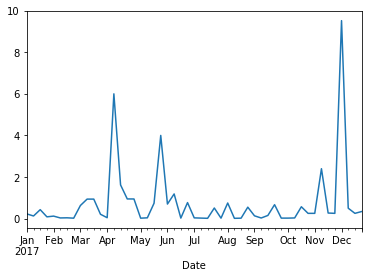

In [329]:
mdl01['CPU %'].dropna().plot()

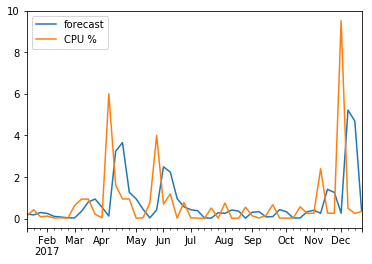

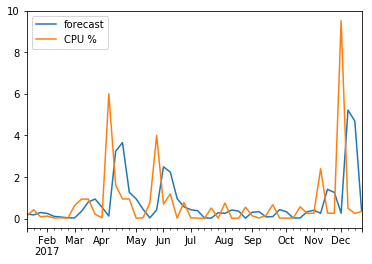

In [330]:
model.plot_predict(1, 50)

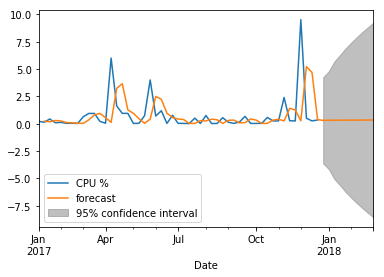

In [334]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl01['CPU %'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)